<a href="https://colab.research.google.com/github/mel-108/Melwin/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
Uploaded=files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:

#1. loading the dataset and displaying basic information

Data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df=pd.DataFrame(Data)
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
#printing the dataset information
print(df.info())

#printing numerical columns
print(df.describe())

#printing categorical columns
print(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#handling missing values

print(df.isnull().sum())

#there is no missing values in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
print(df['Attrition'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [ ]:

#2.calculating the current turnover rate

#Counting the  total employees in the Ibm
total_employees = df.shape[0]

#counting  employees who left the company
employees_left=df[df['Attrition']=='Yes'].shape[0]

#calculating the current turnover rate
turnover_rate=(employees_left/total_employees)* 100

print(f"Total Employees: {total_employees}")
print(f"Employees Left: {employees_left}")
print(f"Turnover Rate: {turnover_rate:.2f}%")

Total Employees: 1470
Employees Left: 237
Turnover Rate: 16.12%


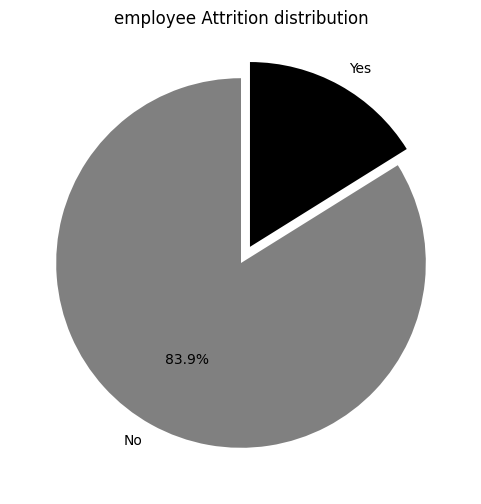

In [ ]:
#data visualisation of employee attrition

#counting the  Attrition categories
attrition_counts = df['Attrition'].value_counts()

#plotting a piechat to represent employee attrition
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90,explode=(0,0.1),colors=["grey","black"])
plt.title("employee Attrition distribution")
plt.show()

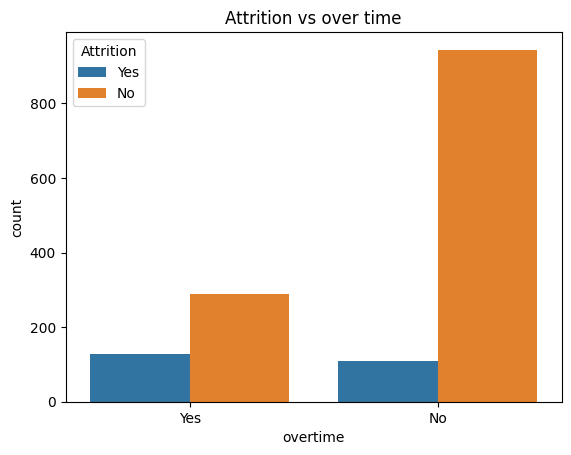

In [ ]:
#3. EXPLORATORY DATA ANALYSIS
#attrition vs over time
#comparing the attrition with overtime using countplot

sns.countplot(data=df, x="OverTime", hue="Attrition")
plt.title('Attrition vs over time')
plt.xlabel('overtime')
plt.ylabel('count')
plt.show()

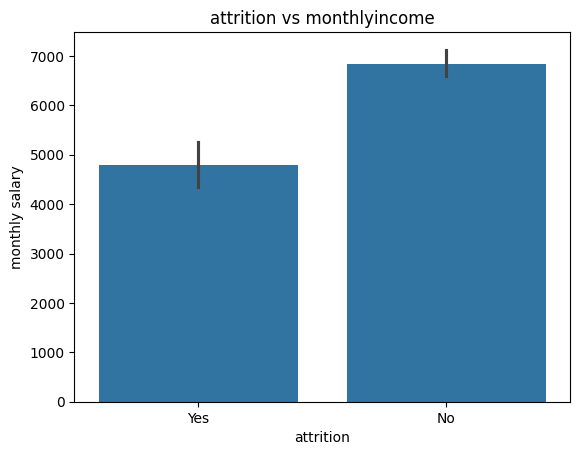

In [ ]:
#attrition vs monthlyincome
#comparing the attrition and monthly salary

sns.barplot(data=df, x="Attrition", y="MonthlyIncome")
plt.title('attrition vs monthlyincome')
plt.xlabel('attrition')
plt.ylabel('monthly salary')
plt.show()

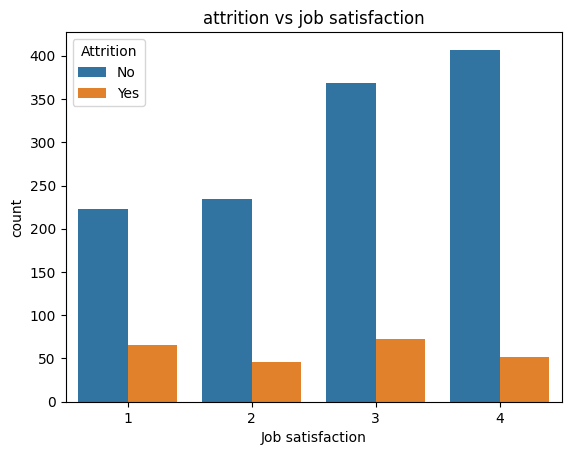

In [ ]:

#attrition vs job satisfaction
#comparing the attrition with job satisfaction using countplot

sns.countplot(data=df, x="JobSatisfaction", hue="Attrition")
plt.title('attrition vs job satisfaction')
plt.xlabel('Job satisfaction')
plt.ylabel('count')
plt.show()

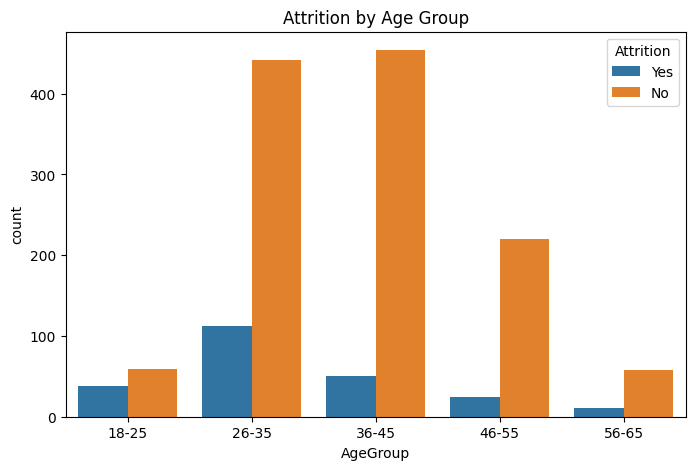

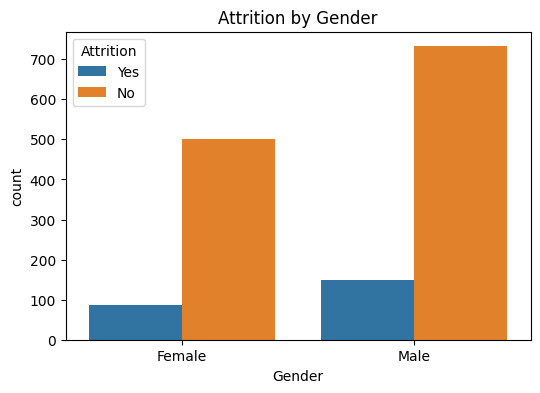

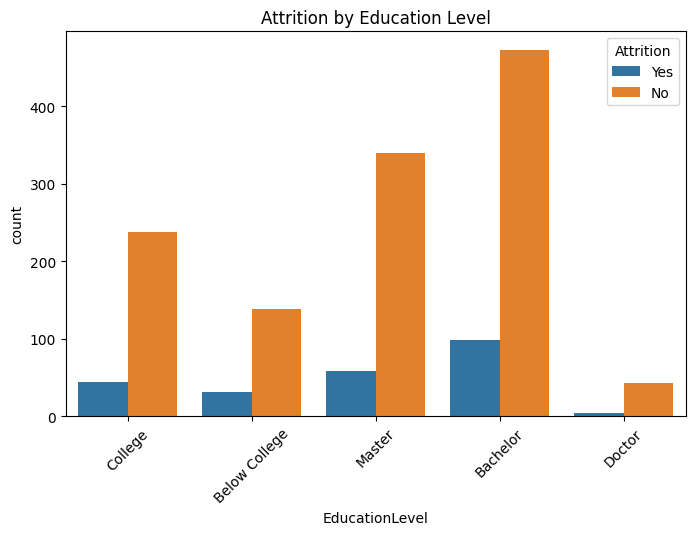

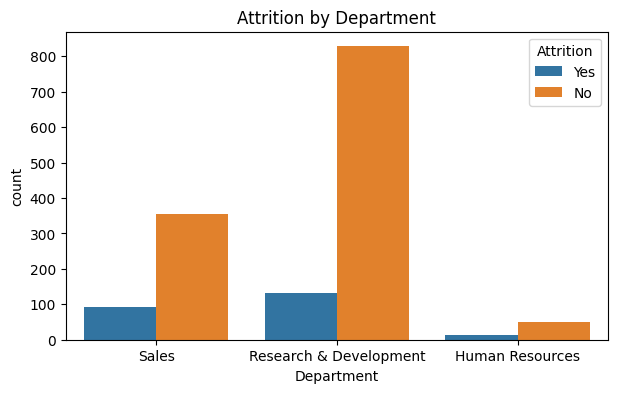

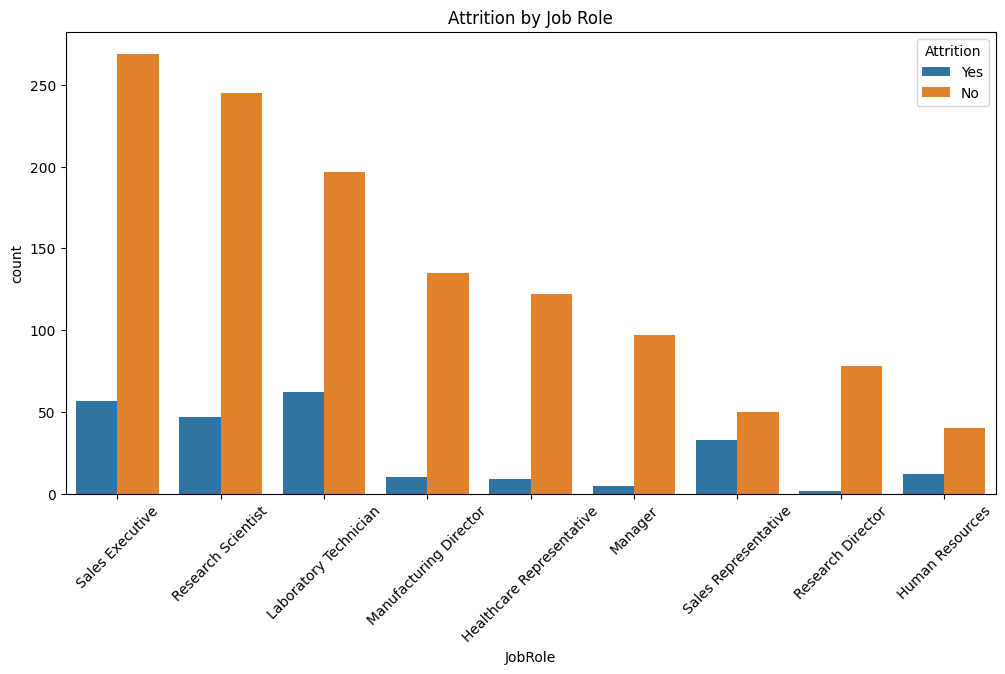

In [ ]:
# 4. DEMOGRAPHIC DISTRIBUTION OF ATTRITION

# attrition by age group
#defining a age cut point
bins = [18, 25, 35, 45, 55, 65]
#human friendly bin for each label
labels = ["18-25", "26-35", "36-45", "46-55", "56-65"]
#creates a new column agegroup by binning the numeric age
# right=false ie left inclusive and right exclusive
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

#draws a barplot of counts per agegroup
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="AgeGroup", hue="Attrition")
plt.title("Attrition by Age Group")
plt.show()

# Attrition by gender
#drwas a bar plot of counts per gender

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="Attrition")
plt.title("Attrition by Gender")
plt.show()

# -------------------------------
# 3. Attrition by Education
#mapping education levels as edu map in a dictionary
edu_map = {
    1: "Below College",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "Doctor"
}
#creating a new column educational level with the mapped levels
df["EducationLevel"] = df["Education"].map(edu_map)

# plotting the barplot for counts per educational level

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="EducationLevel", hue="Attrition")
plt.title("Attrition by Education Level")
plt.xticks(rotation=45)
plt.show()

# Attrition by department
#ploting the barplot for counts per department

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Department", hue="Attrition")
plt.title("Attrition by Department")
plt.show()

#Attrition by job role
# ploting the barplot for counts per job role

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="JobRole", hue="Attrition")
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()

In [ ]:

#4. JOB SATISFACTION AND ENGAGEMENT ANALYSIS

# crosstabing the job satisfaction and attrition
#normalise=index converts row count to row percentage
#each satisfaction level ie %stayed %left

job_sat = pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index') * 100
print("Job Satisfaction vs Attrition (%)")
print(job_sat.round(2))
print("\n")

#crosstabing the job involvement and attrition
#normalise=index converts row count to row percentage
#each involvement level ie %stayed %left

job_involve = pd.crosstab(df['JobInvolvement'], df['Attrition'], normalize='index') * 100
print("Job Involvement vs Attrition (%)")
print(job_involve.round(2))
print("\n")

#crosstabing the Work Life Balance and Attrition
#same as above

wlb = pd.crosstab(df['WorkLifeBalance'], df['Attrition'], normalize='index') * 100
print("Work Life Balance vs Attrition (%)")
print(wlb.round(2))
print("\n")

#crosstabing the  environment satisfaction and attrition
#same as above

env_sat = pd.crosstab(df['EnvironmentSatisfaction'], df['Attrition'], normalize='index') * 100
print("Environment Satisfaction vs Attrition (%)")
print(env_sat.round(2))
print("\n")

#crosstabing the  relationship satisfaction and attritio
# same as above

rel_sat = pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'], normalize='index') * 100
print("Relationship Satisfaction vs Attrition (%)")
print(rel_sat.round(2))

Job Satisfaction vs Attrition (%)
Attrition           No    Yes
JobSatisfaction              
1                77.16  22.84
2                83.57  16.43
3                83.48  16.52
4                88.67  11.33


Job Involvement vs Attrition (%)
Attrition          No    Yes
JobInvolvement              
1               66.27  33.73
2               81.07  18.93
3               85.60  14.40
4               90.97   9.03


Work Life Balance vs Attrition (%)
Attrition           No    Yes
WorkLifeBalance              
1                68.75  31.25
2                83.14  16.86
3                85.78  14.22
4                82.35  17.65


Environment Satisfaction vs Attrition (%)
Attrition                   No    Yes
EnvironmentSatisfaction              
1                        74.65  25.35
2                        85.02  14.98
3                        86.31  13.69
4                        86.55  13.45


Relationship Satisfaction vs Attrition (%)
Attrition                    No    Yes
Rela

In [ ]:
#5. STANDARDISATION

#list of numeric features which we want to scale
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
            'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
            'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

#creating a scaler object that knows how to compute mean and std for each column
scaler = StandardScaler()

#fit () computes each column mean and std
# applies the scaled values back to the same columns
df[num_cols] = scaler.fit_transform(df[num_cols])

#stamdardisation completed
#printing the first 5 rows
print(df[num_cols].head())

        Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0  0.446350   0.742527         -1.010909    1.383138      -0.108350   
1  1.322365  -1.297775         -0.147150   -0.240677      -0.291719   
2  0.008343   1.414363         -0.887515    1.284725      -0.937654   
3 -0.429664   1.461466         -0.764121   -0.486709      -0.763634   
4 -1.086676  -0.524295         -0.887515   -1.274014      -0.644858   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0     0.726020            2.125136          -1.150554          -0.421642   
1     1.488876           -0.678049           2.129306          -0.164511   
2    -1.674841            1.324226          -0.057267          -0.550208   
3     1.243211           -0.678049          -1.150554          -0.421642   
4     0.325900            2.525591          -0.877232          -0.678774   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0              -2.171982       -0.164613           -

In [ ]:

#6. FEATURE SELECTION
#identifying the key features (predictors) of attrition

# Keeping only the important features and  target variable

#creating a list of columns names
#thw first six columns are the predictors
#attrition is the target variable that we want to predict

important_features = [
    'JobSatisfaction',
    'JobInvolvement',
    'WorkLifeBalance',
    'MonthlyIncome',
    'PercentSalaryHike',
    'StockOptionLevel',
    'Attrition'
]
#creating a new dataframe with only those columns from the df
df_subset = df[important_features]

print("Subset of important features:")
print(df_subset.head())

Subset of important features:
   JobSatisfaction  JobInvolvement  WorkLifeBalance  MonthlyIncome  \
0                4               3                1           5993   
1                2               2                3           5130   
2                3               2                3           2090   
3                3               3                3           2909   
4                2               3                3           3468   

   PercentSalaryHike  StockOptionLevel Attrition  
0                 11                 0       Yes  
1                 23                 1        No  
2                 15                 0       Yes  
3                 11                 0        No  
4                 12                 1        No  


In [ ]:
# Group comparison between attrition and important factors
#df subset . groupby it groups data into two categories based on attrition
#  employee who left Yes ,employee who stayed No
#mean() after grouping calculating the average value for each numeric features

grouped_comparison = df_subset.groupby('Attrition').mean()

print("Average values of important features by Attrition status:")
print(grouped_comparison)

Average values of important features by Attrition status:
           JobSatisfaction  JobInvolvement  WorkLifeBalance  MonthlyIncome  \
Attrition                                                                    
No                2.778589        2.770479         2.781022    6832.739659   
Yes               2.468354        2.518987         2.658228    4787.092827   

           PercentSalaryHike  StockOptionLevel  
Attrition                                       
No                 15.231144          0.845093  
Yes                15.097046          0.527426  


In [ ]:

#importing the stats it provides statistical test like T-test , chi-square test

# this uses boolean indexing
#ctrating a new dataframe left that containing rows from df subset where attrition equals to Yes
left = df_subset[df_subset['Attrition'] == 'Yes']
# creating a new dataframe stayed that containing only rows where attrition equals to No
stayed = df_subset[df_subset['Attrition'] == 'No']

print(" T-tests for numerical features")

#performing an independent samples t- test  comparing the monthlyincome in the two groups
#equal var= False uses welch's test which does not assume equal population variances
#stats.ttest_ind(left['MonthlyIncome'], stayed['MonthlyIncome'], equal_var=False)
#this returns the t statistic and pvalue

t_stat, p_val = stats.ttest_ind(left['MonthlyIncome'], stayed['MonthlyIncome'], equal_var=False)
print("MonthlyIncome: t-stat =", t_stat, ", p-value =", p_val)

#same as above but with percentsalaryhike
t_stat, p_val = stats.ttest_ind(left['PercentSalaryHike'], stayed['PercentSalaryHike'], equal_var=False)
print("PercentSalaryHike: t-stat =", t_stat, ", p-value =", p_val)


print("\n Chi-square tests for categorical features")
# creating a contingency table counting occurrences for  each combination of
# attrition and work-lifebalance
# rows are values of attrition
# columns are worklifebalance levels

contingency = pd.crosstab(df_subset['Attrition'], df_subset['WorkLifeBalance'])
# runs a chi square test of independence on the contingency table
# returns chi2(chi square statistics), pvalue ,dof(degree of freedom)and
# expected (expected counts under independence)
# scipy by default applies Yates continuity correlation on 2x2 tables
chi2, p_val, dof, expected = stats.chi2_contingency(contingency)
print("WorkLifeBalance: chi2 =", chi2, ", p-value =", p_val)

#same as above but for Job Satisfaction
contingency = pd.crosstab(df_subset['Attrition'], df_subset['JobSatisfaction'])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency)
print("JobSatisfaction: chi2 =", chi2, ", p-value =", p_val)

#same as above but for Stock Option Level
contingency = pd.crosstab(df_subset['Attrition'], df_subset['StockOptionLevel'])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency)
print("StockOptionLevel: chi2 =", chi2, ", p-value =", p_val)

 T-tests for numerical features
MonthlyIncome: t-stat = -7.482621586644742 , p-value = 4.433588628286071e-13
PercentSalaryHike: t-stat = -0.5042445352368612 , p-value = 0.6144300580581377

 Chi-square tests for categorical features
WorkLifeBalance: chi2 = 16.3250970916474 , p-value = 0.0009725698845348824
JobSatisfaction: chi2 = 17.505077010348 , p-value = 0.0005563004510387556
StockOptionLevel: chi2 = 60.59830108612225 , p-value = 4.379390336108354e-13


In [ ]:
#8. Encode categorical variables using one hot encoding

#creating a list of categorical columns which we want to encode
categorical_cols = ['BusinessTravel', 'Department', 'EducationField',
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Performing  one-hot encoding
#pandas.get dummies used to replace each listed categorical column in df with new binary (0/1)
#for each original columns get dummies creating a new column named x at the end of old column
# for each distinct category X
#columns=categorical_cols limits encoding for only categorical columns
# drop first=True drops one dummy column  per original variables
# to avoid the dummy variable trap

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print("Encoded columns:", df_encoded.columns[:20])

Shape after encoding: (1470, 51)
Encoded columns: Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours'],
      dtype='object')


In [ ]:
#9. CORRELATION ANALYSIS

# Apply one-hot encoding on all categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

#computes the pairwise correlation matrix with all numeric columns in the df_encode
# corr computes pearson correlation and returns square dataframe
# where the entry(I,j) is the correlation between column I and j column
# it uses pairwise complete observation
corr_matrix = df_encoded.corr()

#selects the column of correlation between each feature and target collumn attrition Yes
#sorts them in descending order
#corr matrix is a pdf.series of correlation coefficient between attrition yes and every other column
target_corr = corr_matrix['Attrition_Yes'].sort_values(ascending=False)

print("Top correlations with Attrition:")
print(target_corr.head(15))
print("\nLeast correlations with Attrition:")
print(target_corr.tail(15))

Top correlations with Attrition:
Attrition_Yes                       1.000000
OverTime_Yes                        0.246118
MaritalStatus_Single                0.175419
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
AgeGroup_26-35                      0.086583
Department_Sales                    0.080855
DistanceFromHome                    0.077924
EducationField_Technical Degree     0.069355
EducationField_Marketing            0.055781
NumCompaniesWorked                  0.043494
JobRole_Human Resources             0.036215
Gender_Male                         0.029453
EducationLevel_Below College        0.020777
Name: Attrition_Yes, dtype: float64

Least correlations with Attrition:
MaritalStatus_Married     -0.090984
EnvironmentSatisfaction   -0.103369
JobSatisfaction           -0.103481
AgeGroup_36-45            -0.118492
JobInvolvement            -0.130016
YearsAtCompany            -0.134392
Stoc

In [ ]:

# Separate features X and target y
# x contains all  predicator columns
# y binary target columns created by one hot encoding yes=1 and No=2
#axis =1 tells  drop to remove column
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

#creating a randomforestclassifier with 100 trees
# .fit(x,y) building the forest where each tree is trained on bootstrap sample
# splits are used to reduce impurity
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

#extracts impurity based feature importance for each column in x
# values are normalised of sum to 1
#
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
# building a tidy table pairing each feature name with its importance
#sorts from most to least important
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 15 Important Features:")
print(feature_importance_df.head(15))

Top 15 Important Features:
                    Feature  Importance
11            MonthlyIncome    0.064843
0                       Age    0.053306
46             OverTime_Yes    0.049989
1                 DailyRate    0.047442
19        TotalWorkingYears    0.045933
2          DistanceFromHome    0.044356
7                HourlyRate    0.042654
5            EmployeeNumber    0.041992
12              MonthlyRate    0.041529
22           YearsAtCompany    0.040138
14        PercentSalaryHike    0.032459
25     YearsWithCurrManager    0.031312
13       NumCompaniesWorked    0.030785
6   EnvironmentSatisfaction    0.028156
18         StockOptionLevel    0.025476


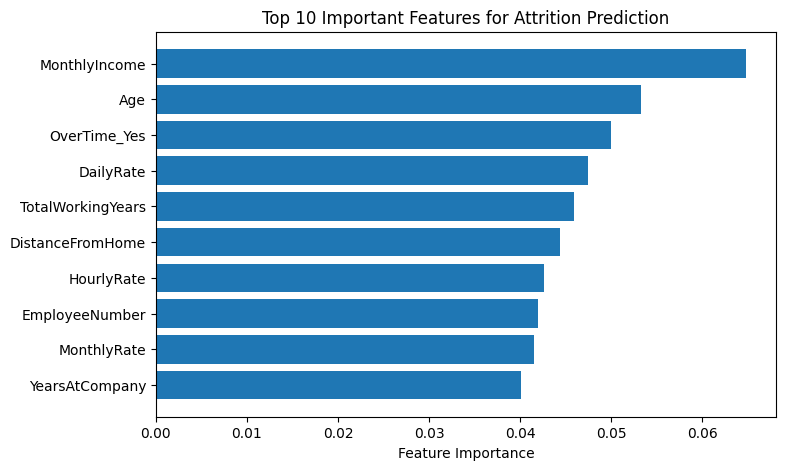

In [ ]:

# Plot top 10 important features
top_features = feature_importance_df.head(10)
plt.figure(figsize=(8,5))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 10 important features for attrition prediction")
plt.xlabel("feature importance")
plt.show()

In [ ]:
#spliting the dataset into training and testing sets

# X contains all independent features
X = df_encoded.drop('Attrition_Yes', axis=1)

# y is the target (1 = Left, 0 = Stayed)
y = df_encoded['Attrition_Yes']

# Split the dataset
# stratify=y ensures same attrition ratio (16% left, 84% stayed) in both train & test
#x,y are the inputs to split
# test size reserving the 20% to test sets and 80% to train sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1176, 55)
Testing set size: (294, 55)


In [ ]:
# MODEL BUILDING

#Building  the Random Forest model
# instantiate random forest classifier object
# n estimators 100 building 100 decision trees in the ensemble
# more trees result in more stability

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#training the random forest using training features X train and labels y train
# the model learns splits in each tree from the training data
rf_model.fit(X_train, y_train)

#uses the trained model to predict class labels for test features X test
# y pred contains predicted class as 0 or 1 for each test row
y_pred = rf_model.predict(X_test)

# Evaluate the model
#computing accuracy ( tp+ tn)/ (tp+tn+fp+fn)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

print("\nClassification Report:")
#printing the classification report
# precision tp/tp+fp-of  predicted positives how many are true
# recall tp/tp+fn - of actual positives how many were found
#f1 score harmonic mean of precision and recall
# support number of true instances for each class
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
#peints the confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8401

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.98      0.91       247
        True       0.50      0.11      0.18        47

    accuracy                           0.84       294
   macro avg       0.68      0.54      0.54       294
weighted avg       0.80      0.84      0.79       294


Confusion Matrix:
[[242   5]
 [ 42   5]]


In [ ]:

#creating a pandas dataframe named future data with 3 example rows
# each dictionary key becomes column each list is a column values
# this represents new employees you want the model to score
# we must include all features that the model expects
future_data = pd.DataFrame({
    'Age': [28, 35, 42],
    'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],
    'DailyRate': [500, 800, 600],
    'Department': ['Sales', 'Research & Development', 'Human Resources'],
    'DistanceFromHome': [10, 2, 15],
    'Education': [3, 4, 2],
    'EducationField': ['Life Sciences', 'Medical', 'Human Resources'],
    'Gender': ['Male', 'Female', 'Male'],
    'JobRole': ['Sales Executive', 'Research Scientist', 'HR'],
    'MonthlyIncome': [4000, 7000, 3500],
    'OverTime': ['Yes', 'No', 'Yes'],
})

#one hot encodes the categorical columns in future data producing new binary column
# this transforms text categories into numeric features suitable for the model
future_data_encoded = pd.get_dummies(future_data)
# it aligns the encoded future data to the exact column set and order the model as x train
# reindex creating a new dataframe whose columns are exactly as x train columns
#if future data encoded has extra columns they are dropped because they aren't in x train
#if future data encoded has lacks any training column
# fill value =0 adds that column filled with zero
future_data_encoded = future_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict future attrition
# uses the trained random forest rf model to predict class labels for each row in future data encoded
# future projections is an array of labels in the same order as the rows
#label mapping depends on how y was encoded during training here 1=Attrition
future_predictions = rf_model.predict(future_data_encoded)
# gets the predicted probabilities from the model
#returns an array of probability for each class
#[:, 1] selects the probability of positive class commonly this is the probability of attrition=1
# you can inspect rf model.classes to confirm which column corresponds to which class
future_probabilities = rf_model.predict_proba(future_data_encoded)[:, 1]

# adding two new columns to original dataframe future data
# predicted Attrition stores the predicted class labels as 0 or 1
#attrition probability stores the model s probability of attrition float 0/1
future_data['Predicted_Attrition'] = future_predictions
future_data['Attrition_Probability'] = future_probabilities

print(future_data[['Age', 'JobRole', 'MonthlyIncome', 'Predicted_Attrition', 'Attrition_Probability']])

   Age             JobRole  MonthlyIncome  Predicted_Attrition  \
0   28     Sales Executive           4000                False   
1   35  Research Scientist           7000                False   
2   42                  HR           3500                False   

   Attrition_Probability  
0                   0.47  
1                   0.30  
2                   0.36  


In [ ]:


#FUTURE PROJECTIONS

#creating a list years containing year values that we want to simulate
# this will be iterates over for loop
years = [2025, 2026, 2027]

#Starting with current employees as baseline
future_projections = []

for year in years:
    #making a copy of X test into future year data
    # x test is used as baseline population for projections
    future_year_data = X_test.copy()

    #adjusting the monthlyincome column to reflect pay increases over time
    # (year-2024) computes how many years ahead the current year
    #ex for 2025 is 1,2026 is 2
    # 0.05*(year-2024) gives the total fractional raise
    # multiplying the original monthlyincome 1+ scales income upwards accordingly
    future_year_data['MonthlyIncome'] = future_year_data['MonthlyIncome'] * (1 + 0.05 * (year - 2024))  # 5% salary hike per year
    #increments the age column by the number of years since 2024 so,each person age appropriately for that simulated year
    future_year_data['Age'] = future_year_data['Age'] + (year - 2024)  # age increases

    # Predict attrition for this year
    # uses the trained random forest rf model to predict class labels
    #preds is an array of predicted labels
    #this assumes future year data is in same feature format(columns, encoding,scaling )the model expects
    # since we started from x test which should be true
    preds = rf_model.predict(future_year_data)
    # gets the predicted probabilities for the positive class for each row
    # rf_model.predict_proba() returns n rows,n classes
    # [:, 1]selects the probability of class 1
    probas = rf_model.predict_proba(future_year_data)[:, 1]

    #creating a dictionary of three keys and append to future projection list
    # Year": year the year this row represents
    #preds.sum() counts how many rows the model predicted as 1
    # this is  the predicted headcount for attrition for that baseline population
    #preds.mean() * 100 the mean of 0/1 prediction is the proportion of rows predicted 1
    # multiplying by 100 converts to a percentage
    future_projections.append({
        "Year": year,
        "Predicted_Attrition_Count": preds.sum(),
        "Predicted_Attrition_Rate": preds.mean() * 100
    })

#conveerting the  list of dictionaries into pandas dataframe
#so that we can easily view and save results
future_projection_df = pd.DataFrame(future_projections)

print(future_projection_df)

   Year  Predicted_Attrition_Count  Predicted_Attrition_Rate
0  2025                          5                  1.700680
1  2026                          3                  1.020408
2  2027                          3                  1.020408


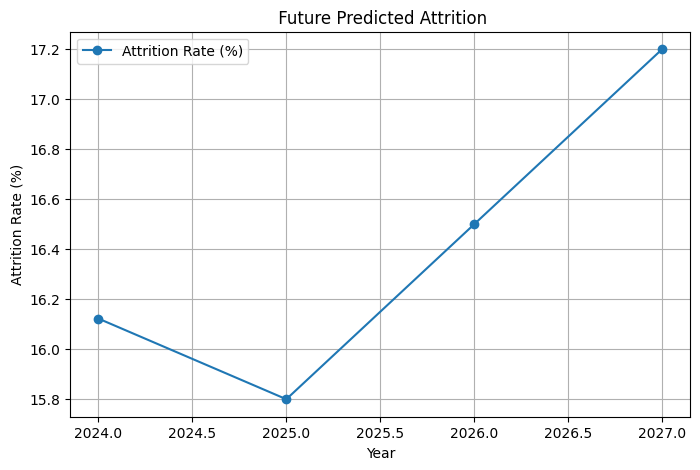

In [ ]:

# creating a dictionary named historical data with two keys year and predicted attrition rate
#computes the mean of y series and multiplied to 100 to convert the fraction into a percentage
# this values represents actual historical attrition percentage for the dataset y
historical_data = {
    "Year": [2024],
    "Predicted_Attrition_Rate": [y.mean() * 100]   # actual attrition %
}
#converting the historical data dictionary to pandas dataframe
# with one row for 2024 and with one column predicted Attrition rate
historical_df = pd.DataFrame(historical_data)

#creating a dataframe containing the future projections values from 2025 to 2027
# replacing the numeric rates with the models output these numbers are percentage
future_projection_df = pd.DataFrame({
    "Year": [2025, 2026, 2027],
    "Predicted_Attrition_Rate": [15.8, 16.5, 17.2]
})

#concatenating the historical and future dataframe into combined df
combined_df = pd.concat([historical_df, future_projection_df])

# Plot
plt.figure(figsize=(8,5))
plt.plot(combined_df["Year"], combined_df["Predicted_Attrition_Rate"], marker='o', label="Attrition Rate (%)")
plt.title(" Future predicted atrition")
plt.xlabel("Year")
plt.ylabel("Attrition rate (%)")
plt.grid(True)
plt.legend()
plt.show()